In [4]:
from sklearn.model_selection import train_test_split  # type: ignore
from sklearn.neural_network import MLPClassifier  # type: ignore
from sklearn.metrics import accuracy_score  # type: ignore
import pandas as pd # type: ignore
import numpy as np # type: ignore

data = pd.read_csv('DATA/train.csv')

X, Y = data.iloc[:, 1:].values / 255, data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
n = X_train.shape[0]
print(f"Rows to train: {n}")
m = X_test.shape[0]
print(f"Rows to test: {m}")

mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=2000, activation='relu', #97.05%
                    solver='sgd', verbose=1, random_state=42,
                    learning_rate_init=0.01, batch_size=4096)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Rows to train: 29400
Rows to test: 12600
Iteration 1, loss = 2.31637060
Iteration 2, loss = 2.12989409
Iteration 3, loss = 1.86546269
Iteration 4, loss = 1.51432992
Iteration 5, loss = 1.13804804
Iteration 6, loss = 0.84807204
Iteration 7, loss = 0.67213728
Iteration 8, loss = 0.56749004
Iteration 9, loss = 0.50187535
Iteration 10, loss = 0.45684177
Iteration 11, loss = 0.42441346
Iteration 12, loss = 0.39946158
Iteration 13, loss = 0.37964580
Iteration 14, loss = 0.36359667
Iteration 15, loss = 0.34930895
Iteration 16, loss = 0.33746062
Iteration 17, loss = 0.32661690
Iteration 18, loss = 0.31756351
Iteration 19, loss = 0.30869225
Iteration 20, loss = 0.30093014
Iteration 21, loss = 0.29451900
Iteration 22, loss = 0.28782735
Iteration 23, loss = 0.28209897
Iteration 24, loss = 0.27617275
Iteration 25, loss = 0.27022890
Iteration 26, loss = 0.26591435
Iteration 27, loss = 0.26099070
Iteration 28, loss = 0.25677578
Iteration 29, loss = 0.25214378
Iteration 30, loss = 0.24810152
Iteratio

Draw a number and press 'Enter' to predict it.
The image is probably a: 4


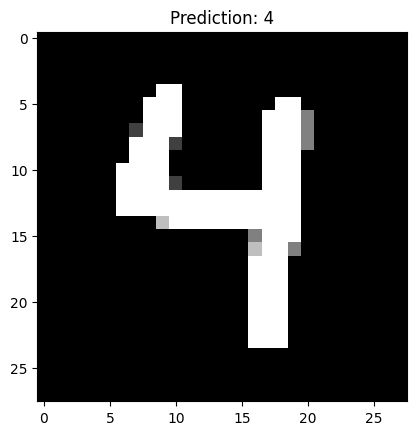

In [2]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import cv2 # type: ignore

# Create a window for drawing
drawing = False  # Controls the drawing state
last_point = None  # Stores the last point drawn

def mouse_callback(event, x, y, flags, param):
    global drawing, last_point
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(canvas, last_point, (x, y), (255, 255, 255), 30)  # Draw with a thickness of 30, in white
            last_point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        last_point = None

# Create a black image of 200x200 pixels
canvas = np.zeros((200, 200), dtype=np.uint8)  # uint8 ranges from 0 to 255 (1 byte)

# Create a window and register the mouse callback
cv2.namedWindow("Drawing Window")  # Define the window
cv2.setMouseCallback("Drawing Window", mouse_callback)  # Associate the window with the function

print("Draw a number and press 'Enter' to predict it.")

while True:
    cv2.imshow("Drawing Window", canvas)  # Show the window
    key = cv2.waitKey(1) & 0xFF  # Check if a key is pressed and get its code between 0 and 255
    if key == 13:  # Enter key
        break
    elif key == 27:  # Escape key
        canvas.fill(0)  # Clear the canvas

cv2.destroyAllWindows()

# Function to preprocess the drawn image
def preprocess_image(img):
    # Resize the image to 20x20 
    img_resized = cv2.resize(img, (20, 20))
    
    # Create a new canvas of 28x28 pixels
    img_with_border = np.zeros((28, 28), dtype=np.uint8)
    
    # Place the resized image in the center of the new image
    img_with_border[4:24, 4:24] = img_resized 
    
    img_with_border = img_with_border / 255.0  # Normalize to 0-1
    img_with_border = img_with_border.flatten()  # Flatten the image to a vector of 784 elements
    return img_with_border

# Process the drawn image
processed_image = preprocess_image(canvas)
processed_image = processed_image.reshape(1, -1)  # Change to the correct shape (1, 784)

# Make prediction using the trained model
prediction = mlp.predict(processed_image)

print(f"The image is probably a: {prediction[0]}")

# Show the image
plt.imshow(processed_image.reshape(28, 28), cmap="gray")
plt.title(f"Prediction: {prediction[0]}")
plt.show()


Prediction for the image: [0]


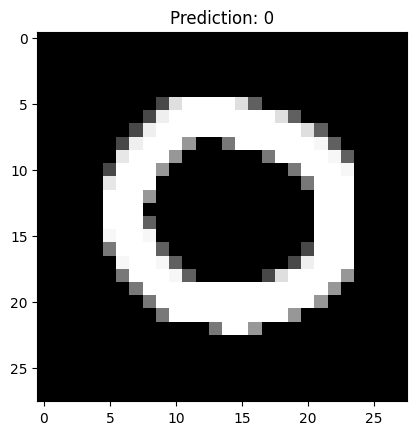

Prediction for the image: [1]


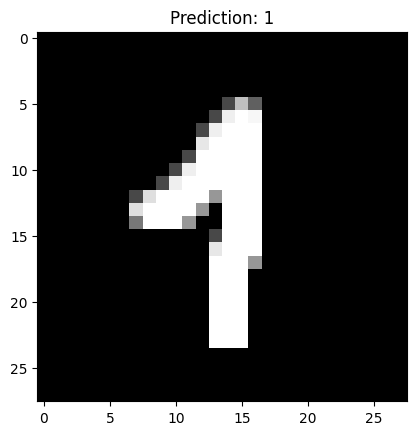

Prediction for the image: [2]


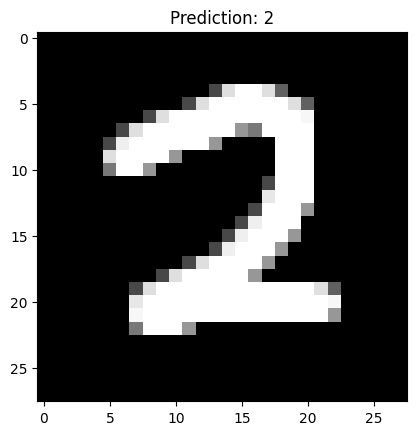

Prediction for the image: [3]


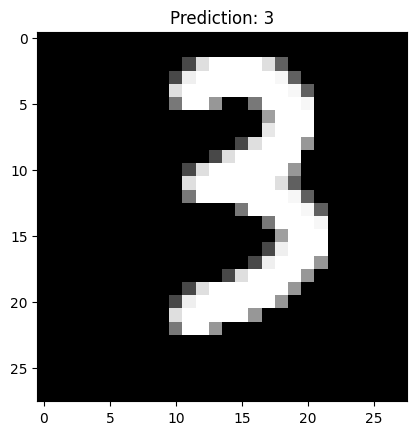

Prediction for the image: [4]


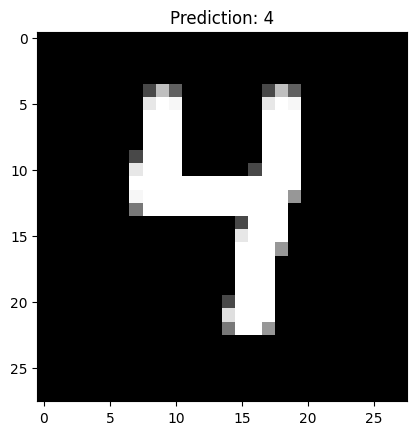

Prediction for the image: [5]


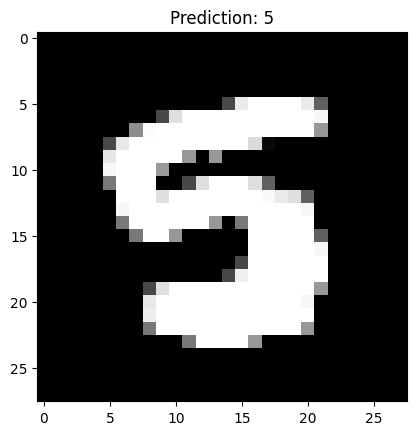

Prediction for the image: [6]


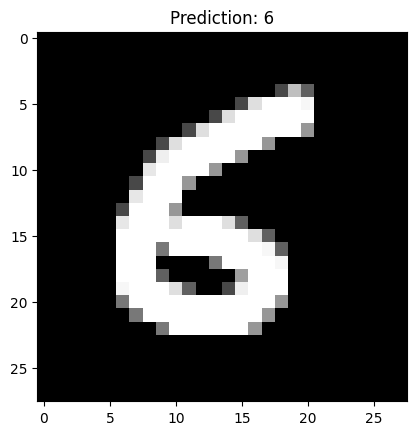

Prediction for the image: [7]


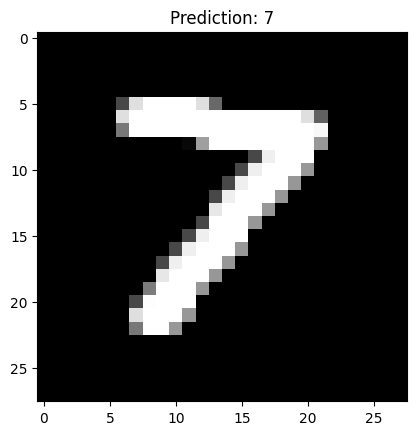

Prediction for the image: [8]


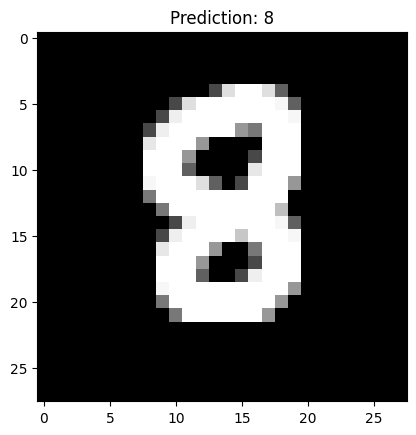

Prediction for the image: [9]


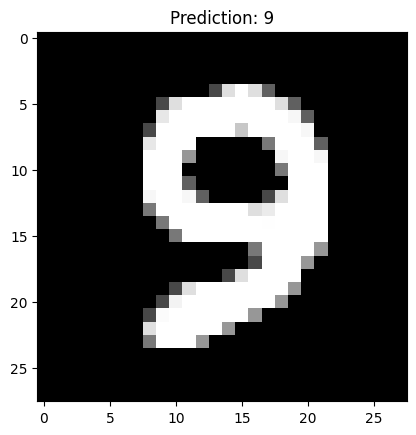

In [3]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import cv2 # type: ignore

# Function to preprocess an image (28x28 pixels, grayscale)
def preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale, removing any RGB channels
    img_resized = cv2.resize(img, (28, 28))  # Resize to 28x28 pixels
    img_resized = img_resized / 255.0  # Normalize from 0 to 1
    img_resized = img_resized.flatten()  # Flatten the image to a vector of 784 elements
    return img_resized

for i in range(10):
    image_path = f"digits/digitB{i}.png"
    processed_image = preprocess_image(image_path)

    processed_image = processed_image.reshape(1, -1)  # Reshape from (784,) to (1, 784) for prediction

    prediction = mlp.predict(processed_image)
    print(f"Prediction for the image: {prediction}")

    # Reshape back to 28x28 for visualization to see what the machine "sees"
    plt.imshow(processed_image.reshape(28, 28), cmap="gray")
    plt.title(f"Prediction: {prediction[0]}")
    plt.show()
